In [54]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from keras.preprocessing import image

import numpy as np
import pandas as pd

BINARY = 0 # 0 for CATEGORICAL 
SVM = 0    # 1 for SVM
DNN = 1    # 1 for DNN
CNN = 0    # 1 for CNN infront of DNN
if SVM == 1 : DNN = 0 
else : DNN = 1
print(BINARY,SVM,DNN)

0 0 1


In [55]:
#set up google drive access with the dataset folder 
import os 
basedir = './dataset'
images_dir = os.path.join(basedir,'image20')
labels_filename = 'label.csv'

from google.colab import drive
drive.mount('/content/drive/')

%cd '/content/drive/My Drive/A/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/A


In [56]:
# Read labels file into labelsDF Pandas DataFrame 
labelsDF = pd.read_csv('dataset/label.csv') # import pandas to read CSV / labelsDF is a pandas data frame 
labels1DF = pd.read_csv('test/label.csv') # import the real test dataset  
print(labelsDF.head(20))
print(labels1DF.head(10))

labels = np.array(labelsDF.label)  # set labels as np array 
labels1 = np.array(labels1DF.label)  # set labels as np array 
print(labels1[0])

# Extract classes and nr_classes
if BINARY == 1 :    # Binary Case 
   nr_classes = 2 
   classes = np.array(['no_tumor','tumor'])
else: #Categorical 
   classes = np.unique(labelsDF.label) # creates a numpy array to place unique labels
   nr_classes = len(np.unique(classes))

y = np.arange(3000)  # define output array y for primary dataset 

# assign output variable y for primary dataset
if BINARY == 1 :    # Binary Case 
   for i in range(0,3000) : 
       if labels[i] == 'no_tumor' : y[i]=0 
       else: y[i]=1 
else:               # Categorical 
   for i in range(0,3000) : 
       if labels[i] == classes[0] : y[i]=0 
       if labels[i] == classes[1] : y[i]=1 
       if labels[i] == classes[2] : y[i]=2 
       if labels[i] == classes[3] : y[i]=3 


y1 = np.arange(200)  # define output array y for real test dataset 

# assign output variable y1 for real test dataset
if BINARY == 1 :    # Binary Case 
   for i in range(0,200) : 
       if labels1[i] == 'no_tumor' : y1[i]=0 
       else: y1[i]=1 
else:               # Categorical 
   for i in range(0,200) : 
       if labels1[i] == classes[0] : y1[i]=0 
       if labels1[i] == classes[1] : y1[i]=1 
       if labels1[i] == classes[2] : y1[i]=2 
       if labels1[i] == classes[3] : y1[i]=3 


print('Nr_Classes :',nr_classes)
print(type(classes))
print(classes)

print('Primary dataset   :',y.shape,np.sum(y))
print('Real test dataset :',y1.shape,np.sum(y1))
print(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8])
print(y1[0],y1[1],y1[2],y1[3],y1[4],y1[5],y1[6],y1[7],y1[8])

         file_name             label
0   IMAGE_0000.jpg  meningioma_tumor
1   IMAGE_0001.jpg          no_tumor
2   IMAGE_0002.jpg  meningioma_tumor
3   IMAGE_0003.jpg      glioma_tumor
4   IMAGE_0004.jpg  meningioma_tumor
5   IMAGE_0005.jpg  meningioma_tumor
6   IMAGE_0006.jpg          no_tumor
7   IMAGE_0007.jpg      glioma_tumor
8   IMAGE_0008.jpg      glioma_tumor
9   IMAGE_0009.jpg   pituitary_tumor
10  IMAGE_0010.jpg   pituitary_tumor
11  IMAGE_0011.jpg      glioma_tumor
12  IMAGE_0012.jpg      glioma_tumor
13  IMAGE_0013.jpg   pituitary_tumor
14  IMAGE_0014.jpg   pituitary_tumor
15  IMAGE_0015.jpg  meningioma_tumor
16  IMAGE_0016.jpg  meningioma_tumor
17  IMAGE_0017.jpg   pituitary_tumor
18  IMAGE_0018.jpg   pituitary_tumor
19  IMAGE_0019.jpg          no_tumor
        file_name             label
0  IMAGE_0000.jpg  meningioma_tumor
1  IMAGE_0001.jpg  meningioma_tumor
2  IMAGE_0002.jpg      glioma_tumor
3  IMAGE_0003.jpg   pituitary_tumor
4  IMAGE_0004.jpg      glioma_tumor
5  IMAG

(512, 512, 3)
(512, 512)
(262144,)
(16384,)


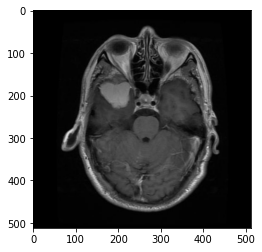

In [57]:
#experiment with some images 

img = imread('test/image/IMAGE_0001.jpg')

imgplot = plt.imshow(img)
#imgplot = plt.imshow(img[::4,::4,:])

#img = mpimg.imread('dataset/image/IMAGE_0001.jpg')
#imgplot = plt.imshow(img[::4,::4,0])  

print(img.shape)
#print(img_resized.shape)
print(img[:,:,0].shape)
print(img[:,:,0].flatten().shape)
print(img[::4,::4,0].flatten().shape)  # reduced shape 

In [58]:
# Create list with images filename and load into feature array X 

image_filenames = []
for i in range(3000):
    image_filenames.append(f'dataset/image/IMAGE_{i:04}.jpg'.format(i))

#creating X list with image content - images are downsized and flattened for SVM 
X=[]
for imagef in image_filenames:
    img = imread(imagef)
    if SVM == 1: 
       X.append(img[::2,::2,0].flatten())  # flatten for SVM 
    else: 
       X.append(img[::2,::2,0])  # only resize for DNN
 
X = np.array(X)  # transform X to nparray for further input to SVM or DNN

# Normalize the pixel values 
#X = X / 255.   

print(X.shape)
#for i in range(0,10) :
#    print(i,X[i],XX[i])

(3000, 256, 256)


In [59]:
# Load the real test dataset to array X1  

image_filenames = []
for i in range(200):
    image_filenames.append(f'test/image/IMAGE_{i:04}.jpg'.format(i))
print(image_filenames)

#creating X list with image content - images are downsized and flattened for SVM 
X1=[]
for imagef in image_filenames:
    img = imread(imagef)
    if SVM == 1: 
       X1.append(img[::2,::2,0].flatten())  # flatten for SVM 
    else: 
       X1.append(img[::2,::2,0])  # only resize for DNN
 
X1 = np.array(X1)  # transform X to nparray for further input to SVM or DNN

# Normalize the pixel values 
#X1 = X1 / 255.  

print(X1.shape)



['test/image/IMAGE_0000.jpg', 'test/image/IMAGE_0001.jpg', 'test/image/IMAGE_0002.jpg', 'test/image/IMAGE_0003.jpg', 'test/image/IMAGE_0004.jpg', 'test/image/IMAGE_0005.jpg', 'test/image/IMAGE_0006.jpg', 'test/image/IMAGE_0007.jpg', 'test/image/IMAGE_0008.jpg', 'test/image/IMAGE_0009.jpg', 'test/image/IMAGE_0010.jpg', 'test/image/IMAGE_0011.jpg', 'test/image/IMAGE_0012.jpg', 'test/image/IMAGE_0013.jpg', 'test/image/IMAGE_0014.jpg', 'test/image/IMAGE_0015.jpg', 'test/image/IMAGE_0016.jpg', 'test/image/IMAGE_0017.jpg', 'test/image/IMAGE_0018.jpg', 'test/image/IMAGE_0019.jpg', 'test/image/IMAGE_0020.jpg', 'test/image/IMAGE_0021.jpg', 'test/image/IMAGE_0022.jpg', 'test/image/IMAGE_0023.jpg', 'test/image/IMAGE_0024.jpg', 'test/image/IMAGE_0025.jpg', 'test/image/IMAGE_0026.jpg', 'test/image/IMAGE_0027.jpg', 'test/image/IMAGE_0028.jpg', 'test/image/IMAGE_0029.jpg', 'test/image/IMAGE_0030.jpg', 'test/image/IMAGE_0031.jpg', 'test/image/IMAGE_0032.jpg', 'test/image/IMAGE_0033.jpg', 'test/image/I

In [60]:
from sklearn.model_selection import train_test_split
 
# Split into training and test datasets 80:20 using train_test_split utility 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
#x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=24) #,stratify=y)
print(type(x_train),x_train.shape,type(y_train),y_train.shape)
print(y_test[0])

<class 'numpy.ndarray'> (2400, 256, 256) <class 'numpy.ndarray'> (2400,)
1


In [61]:
#################################################################################
############  SVM SUPPORT VECTOR MACHINES
#################################################################################

In [62]:
from sklearn import svm

if SVM == 1 : 
   # gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
   #svc = svm.SVC()  # SVM Classifier with default rbf kernel 
   #svc = svm.SVC(kernel='linear')  # linear kernel 
   svc = svm.SVC(kernel='poly')   #, degree=4)    # poly kernel 
   #svc = svm.SVC(kernel='rbf')    #, C=1) #gamma = 0.01)

   svc.fit(x_train, y_train)       # Fit it with the training data 

   y_pred = svc.predict(x_test)  # make the prediction on the validation/test data from the primary dataset 
   y1_pred = svc.predict(X1)     # make the prediction on the real test data 

In [63]:
##################################################################################################
##########  DNN IMPLEMENTATION START HERE 
##################################################################################################

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if DNN == 2 : 
   datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


   datagen.fit(x_train)

In [65]:
# DNN IMPLEMENTATION

# Implement Keras framework for model definition and parametrization 

import tensorflow as tf
import keras

#tf.keras.backend.clear_session()

print(tf.__version__)

from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


if DNN == 1: 

    model = Sequential()
    #model.add(keras.layers.BatchNormalization(input_shape = (128,128,3)))
    model.add(keras.layers.BatchNormalization(input_shape = (256,256,1)))
    #model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))

    #CNN in front of the Dense layers
    if CNN == 1:   
       model.add(Conv2D(256, (3, 3)))
       model.add(Activation('relu'))
       model.add(MaxPooling2D(pool_size=(2, 2))) #Downsamples the input along the pool_size window by taking the maximum value 

       model.add(Conv2D(128, (3, 3)))
       model.add(Activation('relu'))
       model.add(MaxPooling2D(pool_size=(2, 2)))

       model.add(Conv2D(64, (3, 3)))  #64
       model.add(Activation('relu'))
       model.add(MaxPooling2D(pool_size=(2, 2)))
       #model.add(Dropout(0.5))   # use dropout to cut some connections and reduce overfitting 


    #Dense layers start here 
    #model.add(Flatten(input_shape=(256, 256, 3))) #use without Con2D layers  
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

    #model.add(Dense(256))   #  64, 128, 256, 512 etc. 
    #model.add(Activation('relu'))
                        #model.add(Dropout(0.5))   # dropout here degrades performance  

    #model.add(Dense(128))   #  64, 128, 256, ....  
    #model.add(Activation('relu'))
                        #model.add(Dropout(0.5))   # dropout here degrades performance  

    model.add(Dense(64))   #  64 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))   # use dropout to cut some connections and reduce overfitting 


    if BINARY == 1 : 
       model.add(Dense(1))
       model.add(Activation('sigmoid'))  # use sigmoid activation suitable for the binary outcome 
    else :
       #Last layer of classification network #softmax used as the activation so that the result is formed as a probability distribution.
       model.add(Dense(nr_classes))
       model.add(Activation('softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)   # experimented with different lr 
    #opt = tf.keras.optimizers.SGD(learning_rate=0.01)     #             >> 
    
    # model compile parametrization for binary and categorical classification 
    if BINARY == 1 : 
       model.compile(loss='binary_crossentropy', 
                     optimizer=opt, 
                     metrics=['accuracy'])
    else: 
       model.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=opt, 
                     metrics=['accuracy'])



    model.summary()

2.7.0
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 256, 256, 1)      4         
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 65536)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                4194368   
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                

In [66]:
if DNN == 1 : 
   if BINARY==1 : 
      history = model.fit(x_train,y_train,validation_data=(x_test, y_test), verbose=1, 
                          class_weight = {0:3.15, 1:0.59},  # class_weights for binary
                          epochs=20)  
   else : 
      history = model.fit(x_train,y_train,validation_data=(x_test, y_test), verbose=1, 
                          class_weight = {0:0.87, 1:0.88, 2:1.65, 3:0.9},  # class_weights for multiclass 
                          epochs=20) 
     

Epoch 1/20
75/75 [==============================] - 9s 117ms/step - loss: 1.5164 - accuracy: 0.3967 - val_loss: 1.5976 - val_accuracy: 0.2300
Epoch 2/20
75/75 [==============================] - 9s 114ms/step - loss: 1.1943 - accuracy: 0.4321 - val_loss: 1.0925 - val_accuracy: 0.4883
Epoch 3/20
75/75 [==============================] - 9s 114ms/step - loss: 1.1233 - accuracy: 0.4158 - val_loss: 1.0976 - val_accuracy: 0.4917
Epoch 4/20
75/75 [==============================] - 9s 115ms/step - loss: 1.0908 - accuracy: 0.4592 - val_loss: 0.9792 - val_accuracy: 0.5600
Epoch 5/20
75/75 [==============================] - 9s 114ms/step - loss: 1.0750 - accuracy: 0.4667 - val_loss: 0.9425 - val_accuracy: 0.5717
Epoch 6/20
75/75 [==============================] - 9s 114ms/step - loss: 1.0182 - accuracy: 0.4900 - val_loss: 0.8962 - val_accuracy: 0.5817
Epoch 7/20
75/75 [==============================] - 10s 136ms/step - loss: 0.9877 - accuracy: 0.5154 - val_loss: 0.8517 - val_accuracy: 0.6167
Epoch

In [67]:
if DNN == 1 : 
   test_loss, test_acc = model.evaluate(x_test, y_test)

   print(test_loss, test_acc)

19/19 [==============================] - 0s 18ms/step - loss: 0.6735 - accuracy: 0.7883
0.6735196113586426 0.7883333563804626


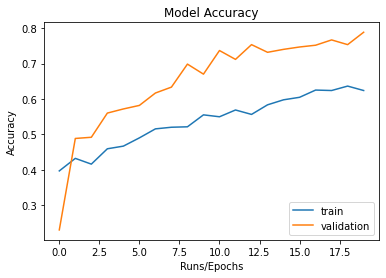

In [68]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.xlabel("Runs/Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="lower right")
    plt.show()

if DNN == 1 : 
   plot_hist(history)

In [69]:
# DNN Perform the prediction on the test data 

if DNN ==1 :
   if BINARY == 1:  
      y_pred = np.round_(model.predict(x_test))
      y1_pred = np.round_(model.predict(X1))
   else : 
      y_pred = np.argmax(model.predict(x_test), axis=1)
      y1_pred = np.argmax(model.predict(X1), axis=1)

   print(type(y_pred),y_pred.shape)

   print(y_pred[0],y_pred[1],y_pred[2],y_pred[3])

<class 'numpy.ndarray'> (600,)
1 2 1 0


Accuracy:  0.7883333333333333
Confusion Matrix : 
[[115  44   6   3]
 [ 19 123  17   4]
 [  1  15  73   5]
 [  4   8   1 162]]


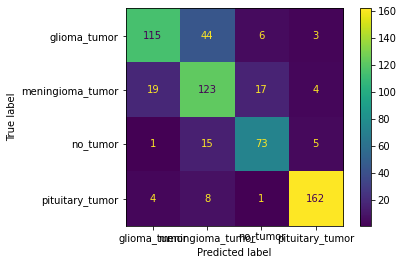

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       168
           1       0.65      0.75      0.70       163
           2       0.75      0.78      0.76        94
           3       0.93      0.93      0.93       175

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.78       600
weighted avg       0.80      0.79      0.79       600



In [70]:
# Calculate predicted values and performance / accuracy metrics 
# https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
# https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1
# Implement and plot Confusion matrix  
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ', accuracy)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ')
print(cm)

cm_vis = ConfusionMatrixDisplay(cm, display_labels=classes)
cm_vis.plot()
plt.show()

# Performance report including precision, recall, f1-score
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.76
Confusion Matrix : 
[[34  6  3  0]
 [11 41  9  7]
 [ 1  6 27  3]
 [ 1  1  0 50]]


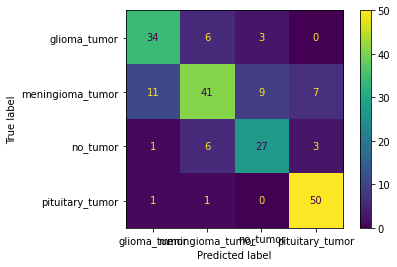

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       168
           1       0.65      0.75      0.70       163
           2       0.75      0.78      0.76        94
           3       0.93      0.93      0.93       175

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.78       600
weighted avg       0.80      0.79      0.79       600



In [71]:
#Calculate Performance metrics on the real test data y1, y1_pred

accuracy = accuracy_score(y1,y1_pred)
print('Accuracy: ', round(accuracy,2))

# Confusion Matrix 
cm = confusion_matrix(y1, y1_pred)
print('Confusion Matrix : ')
print(cm)

cm_vis = ConfusionMatrixDisplay(cm, display_labels=classes)
cm_vis.plot()
plt.show()

# Performance report including precision, recall, f1-score
print(metrics.classification_report(y_test, y_pred))